In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
dfNJ = df[df.state == 'New Jersey']
dfLTCNJ = pd.read_excel('LTC_Facilities_Outbreaks_List.xlsx', sheet_name='Table 1', skiprows=5)

In [3]:
dfNJ = df[df.state == 'New Jersey'].copy()
dfNJFull = dfNJ.sort_values(by=['county', 'date']).copy()
#df['dA'] = df['A'] - df['A'].shift(-1)
dfNJ.rename(columns={'county': 'County'}, inplace=True)

In [4]:
def diffCounty(deaths, prevDeaths, county, prevCounty):
    if county == prevCounty:
        return deaths - prevDeaths
    else:
        return 0

dfNJFull['newDeaths'] = dfNJFull['deaths'] - dfNJFull['deaths'].shift(1)

In [5]:
dfNJFull['newDeaths'].fillna(0, inplace=True)
#dfNJFull['newDeaths'] = 

In [6]:
for county in dfNJFull.county.unique():
    countyDF = dfNJFull[dfNJFull.county == county]
    minDate = countyDF.date.min()
    countyDF[countyDF.date == minDate]['newDeaths'] = 0
    print(countyDF.head(3))  

            date    county       state     fips  cases  deaths  newDeaths
4110  2020-03-18  Atlantic  New Jersey  34001.0      3       0        0.0
4836  2020-03-19  Atlantic  New Jersey  34001.0      3       0        0.0
5679  2020-03-20  Atlantic  New Jersey  34001.0      3       0        0.0
           date  county       state     fips  cases  deaths  newDeaths
517  2020-03-04  Bergen  New Jersey  34003.0      1       0     -156.0
563  2020-03-05  Bergen  New Jersey  34003.0      2       0        0.0
624  2020-03-06  Bergen  New Jersey  34003.0      3       0        0.0
            date      county       state     fips  cases  deaths  newDeaths
1091  2020-03-10  Burlington  New Jersey  34005.0      2       0    -1553.0
1273  2020-03-11  Burlington  New Jersey  34005.0      2       0        0.0
1502  2020-03-12  Burlington  New Jersey  34005.0      2       0        0.0
           date  county       state     fips  cases  deaths  newDeaths
625  2020-03-06  Camden  New Jersey  34007.0 

/home/steve/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/steve/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/steve/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [7]:
maxDate = dfNJ.date.max()
dfNJ = dfNJ[dfNJ.date == maxDate]

In [8]:
dfNJCounty = dfNJ.groupby(by=['County', 'fips']).sum()
dfNJCounty

,,cases,deaths
County,fips,,
Atlantic,34001.0,2120,156
Bergen,34003.0,18158,1553
Burlington,34005.0,4476,277
Camden,34007.0,6292,318
Cape May,34009.0,602,48
Cumberland,34011.0,2146,65
Essex,34013.0,17450,1628
Gloucester,34015.0,2165,143
Hudson,34017.0,18226,1161


In [9]:
dfLTCCounty = dfLTCNJ.groupby(by=['County']).sum()
dfLTCCounty.rename(columns={'Number of COVID\nConfirmed Residents': 'LTC Resident Cases', 
                            'Number of COVID\nConfirmed Staff': 'LTC Staff Cases',
                            'Number of COVID\nConfirmed Deaths among Residents': 'LTC Resident Deaths',
                            'Number of COVID Confirmed Deaths among Staff': 'LTC Staff Deaths'}, inplace=True)
dfLTCCounty

,LTC Resident Cases,LTC Staff Cases,LTC Resident Deaths,LTC Staff Deaths
County,,,,
Atlantic,579,229,116,1
Bergen,3033,1480,897,10
Burlington,1253,629,223,4
Camden,1092,358,232,3
Cape_May,187,135,38,0
Cumberland,268,172,31,1
Essex,2025,870,533,19
Gloucester,437,214,110,2
Hudson,713,409,187,7


In [10]:
dfNJ_w_LTC_df = dfLTCCounty.join(dfNJCounty)
dfNJ_w_LTC_df['LTC Deaths'] = dfNJ_w_LTC_df['LTC Resident Deaths'] + dfNJ_w_LTC_df['LTC Staff Deaths']
dfNJ_w_LTC_df['Deaths Non LTC'] = dfNJ_w_LTC_df['deaths'] - dfNJ_w_LTC_df['LTC Deaths']
dfNJ_w_LTC_df['LTC Cases'] = dfNJ_w_LTC_df['LTC Resident Cases'] + dfNJ_w_LTC_df['LTC Staff Cases']
dfNJ_w_LTC_df['Cases Non LTC'] = dfNJ_w_LTC_df['cases'] - dfNJ_w_LTC_df['LTC Cases']
dfNJ_w_LTC_df['% Deaths LTC'] = dfNJ_w_LTC_df['LTC Deaths'] / dfNJ_w_LTC_df['deaths']

In [11]:
dfNJ_w_LTC_df.sort_values(by=['deaths'], ascending=False, inplace=True)
dfNJ_w_LTC_df.head(2)

,,LTC Resident Cases,LTC Staff Cases,LTC Resident Deaths,LTC Staff Deaths,cases,deaths,LTC Deaths,Deaths Non LTC,LTC Cases,Cases Non LTC,% Deaths LTC
County,fips,,,,,,,,,,,
Essex,34013.0,2025,870,533,19,17450,1628,552,1076,2895,14555,0.339066
Bergen,34003.0,3033,1480,897,10,18158,1553,907,646,4513,13645,0.584031


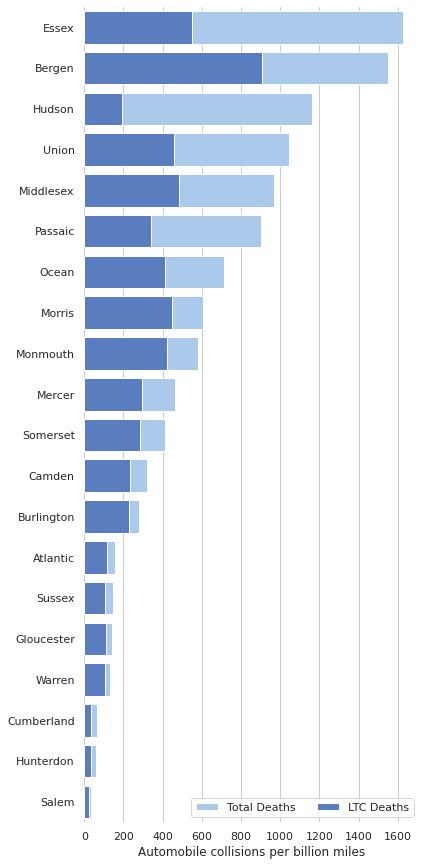

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
import seaborn as sns

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
#crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="deaths", y="County", data=dfNJ_w_LTC_df.reset_index(),
            label="Total Deaths", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="LTC Deaths", y="County", data=dfNJ_w_LTC_df.reset_index(),
            label="LTC Deaths", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

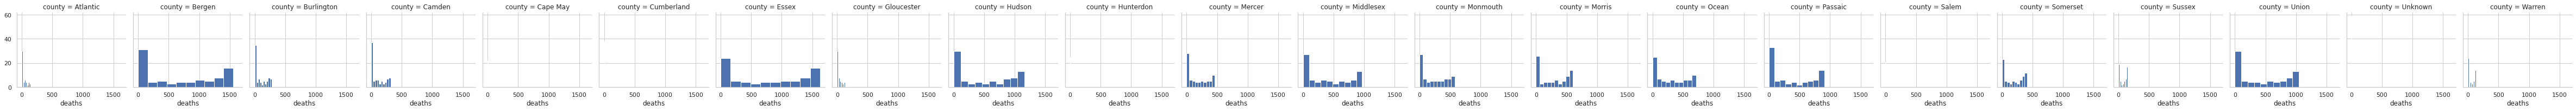

In [14]:
g = sns.FacetGrid(dfNJFull, col="county")
g.map(plt.hist, "deaths");

In [ ]:
dfBarley = pd.read_json(data.barley.url)
dfBarley.head(5)

In [ ]:
dfNJ

In [17]:
import altair as alt
from vega_datasets import data

source = data.barley.url
source = dfNJFull

alt.Chart(source).mark_area().encode(
    x = 'date',
    y='deaths',
    facet=alt.Facet('county:O', columns=4),
).properties(
    width=200,
    height=100,
)

alt.Chart(...)

In [ ]:
sns.set(style="ticks")
g = sns.FacetGrid(dfNJ.head(5), col="County")
g.map(plt.hist, "deaths");

In [ ]:
dfNJ